In [68]:
# Code Block 1: Import necessary libraries

# pandas for reading the dataset file
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [13]:
# Code Block 2: Load Dataset

# When downloaded the dataset, it had two files, one was of data, which has no column names and one file was of names, which told that there
# are 32 features
# i loaded the data file in my working colab file
# i had no direct information for the column names, so i went to the source and took the columns name from there


columns = ['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area',
           'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points',
           'Mean Symmetry', 'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter',
           'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity', 'SE Concave Points',
           'SE Symmetry', 'SE Fractal Dimension', 'Worst Radius', 'Worst Texture', 'Worst Perimeter',
           'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points',
           'Worst Symmetry', 'Worst Fractal Dimension']


# creating a pandas data frame
# our wdbc.data was stored in a csv file, but had no columns names, so i used this way to create dataframe

data= pd.read_csv("/content/wdbc.data",header=None,names=columns)


# Printing the first few rows of dataset

pd.set_option('display.max_columns', None)
data.head(4)





,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,SE Radius,SE Texture,SE Perimeter,SE Area,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dimension,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [14]:
# Code Block 3: Explore the data

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Mean Radius              569 non-null    float64
 3   Mean Texture             569 non-null    float64
 4   Mean Perimeter           569 non-null    float64
 5   Mean Area                569 non-null    float64
 6   Mean Smoothness          569 non-null    float64
 7   Mean Compactness         569 non-null    float64
 8   Mean Concavity           569 non-null    float64
 9   Mean Concave Points      569 non-null    float64
 10  Mean Symmetry            569 non-null    float64
 11  Mean Fractal Dimension   569 non-null    float64
 12  SE Radius                569 non-null    float64
 13  SE Texture               569 non-null    float64
 14  SE Perimeter             5

In [23]:
data.describe()

,ID,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,SE Radius,SE Texture,SE Perimeter,SE Area,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dimension,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
data.isna().sum()

ID                         0
Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
SE Radius                  0
SE Texture                 0
SE Perimeter               0
SE Area                    0
SE Smoothness              0
SE Compactness             0
SE Concavity               0
SE Concave Points          0
SE Symmetry                0
SE Fractal Dimension       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
dtype: int64

From the code block 3, there are no null or missing values


In [45]:
# Code Block 4: Preprocess data

# In this stage, the Id column will not be included in the features or target variable column, since its not significant
# Also, Target variable will be encoded using label encoder, Diagnosis (M = malignant, B = benign) the binary values will be assigned to it
# 1 is assinged to M, Malignant, 0 is assigned to benign

label_encoder = LabelEncoder()
diagnosis_encoded = label_encoder.fit_transform(data['Diagnosis'])
data['Diagnosis'] = diagnosis_encoded

# splitting the dataset into features (X) and target variable (y)

to_remove_list=['ID','Diagnosis']
X = data.drop(to_remove_list ,axis=1)
y_series = data['Diagnosis']
y= pd.DataFrame(y_series)


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [47]:
# Code Block 5 & 6

model = XGBRFClassifier()
model.fit (X_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [48]:
# Code Block 7

y_pred = model.predict(X_test)

In [65]:
# Code Block 8
# evaluating the model
# Calculate accuracy and generate classification report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("accuracy of the model is : ", accuracy)
print("\n Classification Report of the model is:")
print(classification_rep)

accuracy of the model is :  0.956140350877193

 Classification Report of the model is:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



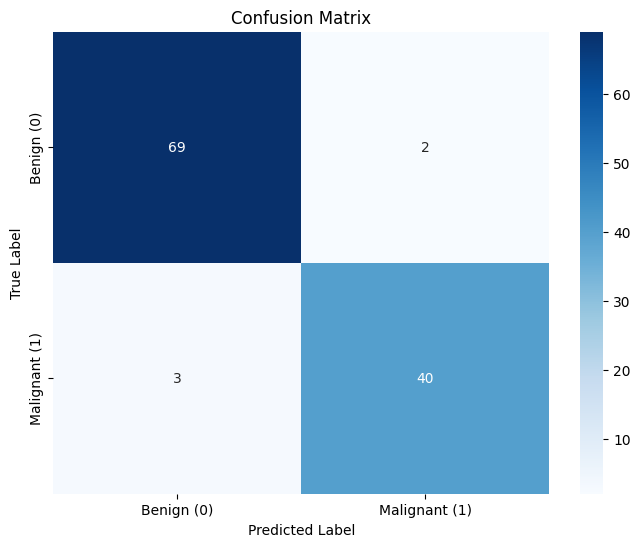

In [67]:
# Code Block 9

conf_matrix = confusion_matrix(y_test, y_pred)


# Plot confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



The model has 69 True Negatives.
The model has 3 False Negatives.
The model has 40 True Positives.
The model has 2 False Positives.